# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sinasc = pd.read_csv('sinasc_RO_2019.csv')

for column in ['APGAR1', 'APGAR5', 'ESTCIVMAE']:
    sinasc.loc[sinasc[column].isna(), column] = 9 # alterando valores NaN para 9 (ignorado) para mudar a coluna toda para int
    sinasc [column] = sinasc[column].astype(int) # alterando as colunas para int para melhorar a visualização dos gráficos

sinasc.head()


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

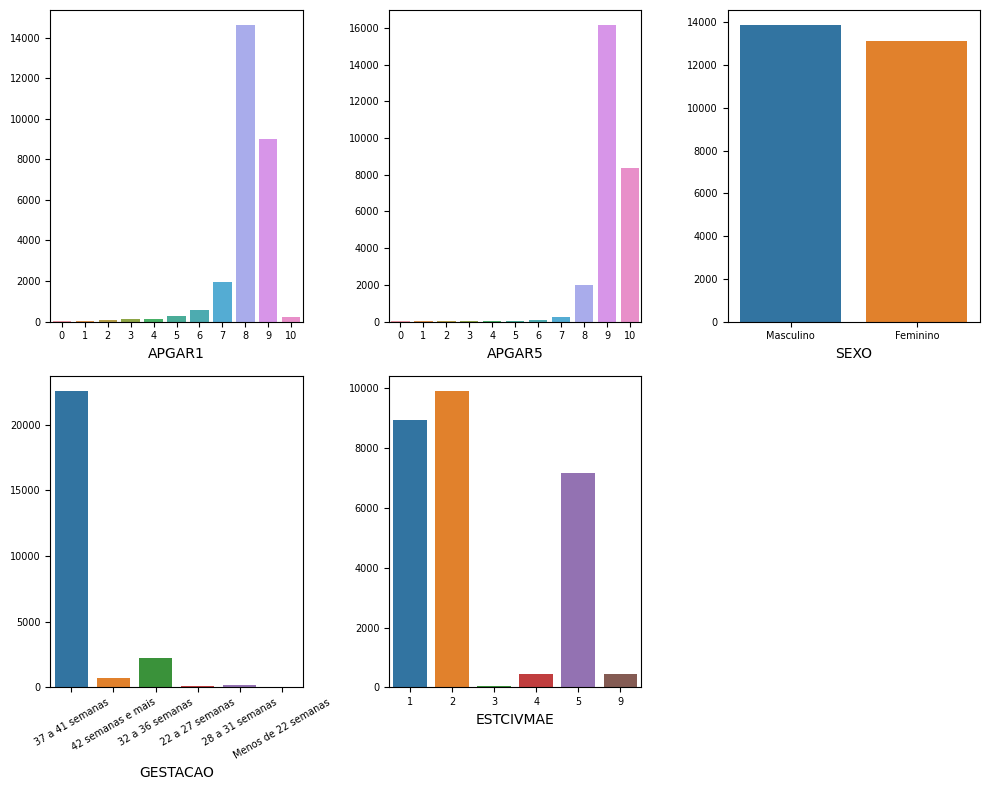

In [46]:
plt.rc('figure', figsize=(10,8))
fig, axes = plt.subplots(2,3)

sns.countplot(ax = axes [0, 0], x='APGAR1', data=sinasc)
sns.countplot(ax = axes [0, 1], x='APGAR5', data=sinasc)
sns.countplot(ax = axes [0, 2], x='SEXO', data=sinasc)
sns.countplot(ax = axes [1, 0], x='GESTACAO', data=sinasc)
sns.countplot(ax = axes [1, 1], x='ESTCIVMAE', data=sinasc)


fig.delaxes(axes [1,2]) # removendo o gráfico que ficou vazio

# ajustando os tamanhos das labels, pois ficaram muito grandes e estavam se sobrepondo
for ax in axes.flat:
    if ax is not None:  
        ax.tick_params(axis='x', labelsize=7)
        ax.tick_params(axis='y', labelsize=7)
        ax.set_ylabel('') # removendo a label do eixo Y por estar sobrepondo os outros gráficos
        

# rotacionando para os índices não se sobreporem        
axes[1, 0].tick_params(axis='x', rotation=30)


plt.tight_layout()
plt.show()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

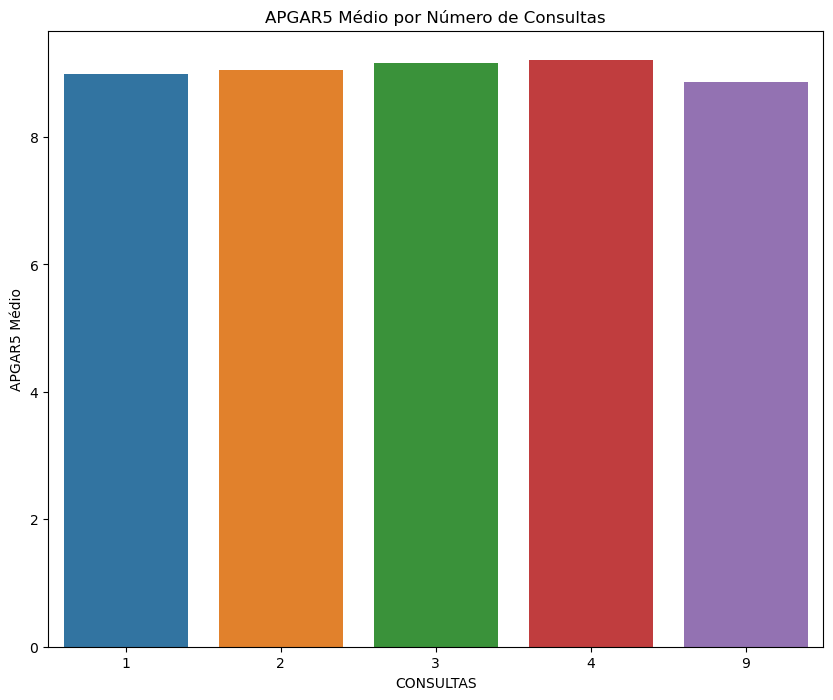

In [50]:
plt.rc('figure', figsize=(10, 8))

plt.figure(figsize=(10, 8))
sns.barplot(x='CONSULTAS', y='APGAR5', data=sinasc, errorbar=None)
plt.ylabel('APGAR5 Médio')
plt.title('APGAR5 Médio por Número de Consultas')

plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

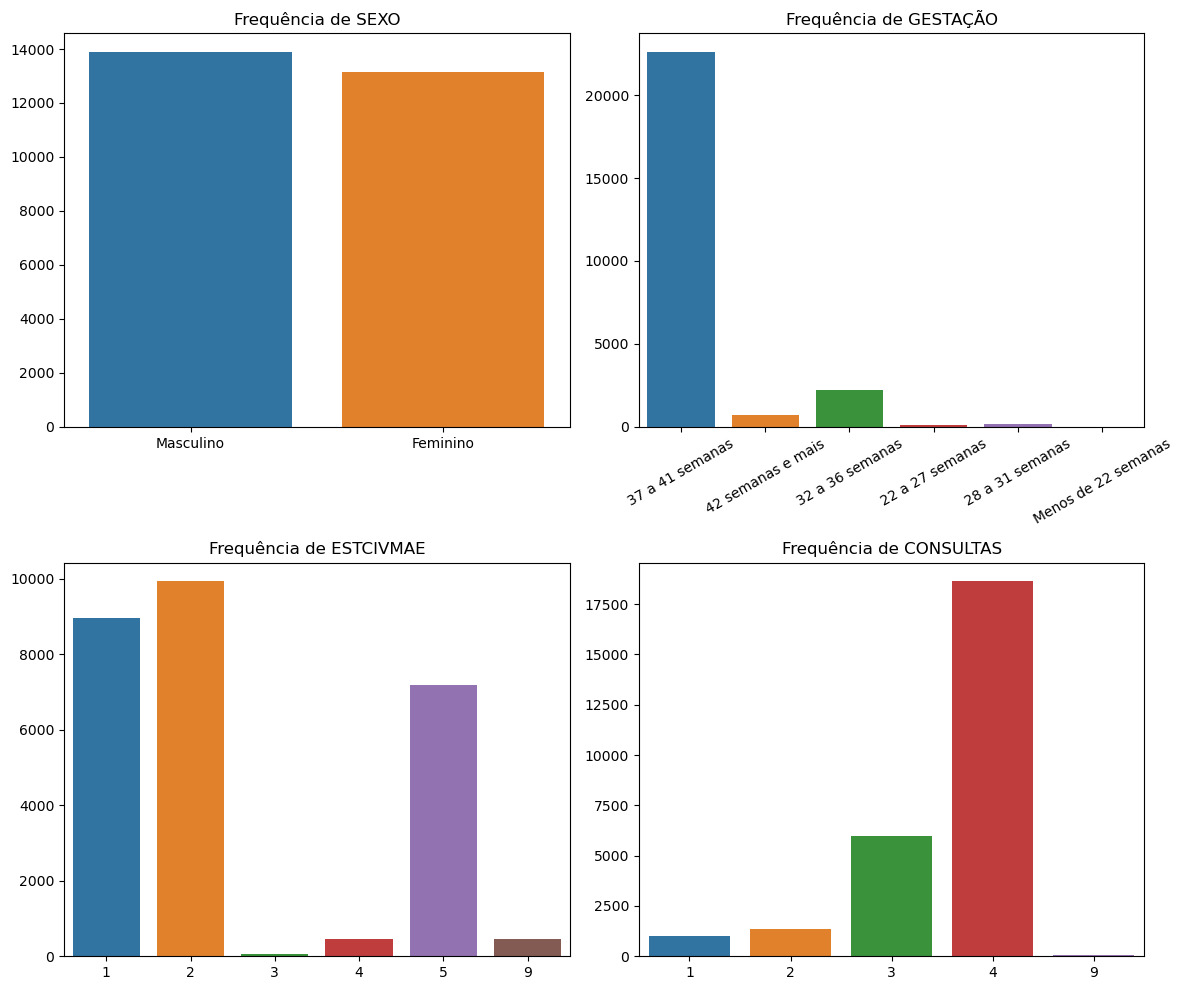

In [55]:
plt.rc('figure', figsize=(12, 10))

fig, axes = plt.subplots(2, 2)

sns.countplot(ax=axes[0, 0], x='SEXO', data=sinasc)
sns.countplot(ax=axes[0, 1], x='GESTACAO', data=sinasc)
sns.countplot(ax=axes[1, 0], x='ESTCIVMAE', data=sinasc)
sns.countplot(ax=axes[1, 1], x='CONSULTAS', data=sinasc)

axes[0, 0].set_title('Frequência de SEXO')
axes[0, 1].set_title('Frequência de GESTAÇÃO')
axes[1, 0].set_title('Frequência de ESTCIVMAE')
axes[1, 1].set_title('Frequência de CONSULTAS')

axes[0, 1].tick_params(axis='x', rotation=30)

for ax in axes.flat:
    if ax is not None:  
        ax.set_xlabel('')
        ax.set_ylabel('')

plt.tight_layout()

plt.show()